# Data import & data processing

<!DOCTYPE html>
<html>
<head>
    <title>Project Progress</title>
</head>
<body>
    <h1>Project Progress Overview</h1>
    <ul>
        <li><strong>Data Collection</strong>: A European index from 1998 to 2023, inflation, output gap, and main refinancing rate in Europe [?]</li>
        <li><strong>Scrapping and Data Cleaning and Consolidation</strong> [Done]</li>
        <li><strong>Calculating the Jaccard Similarity</strong> [Done] - Assigned to Gwen for improvement</li>
        <li><strong>Calculating the Pessimism Score for Every Period</strong> [Done]</li>
        <li><strong>Pessimism Score Improvement Using Hugo's Algorithm</strong> - Assigned to Hugo</li>
        <li><strong>Final DataFrame Construction</strong> - Assigned to Charaf</li>
        <li><strong>Calculating the Cumulative Abnormal Returns for the European Index</strong> - Assigned to Gwen</li>
        <li><strong>Regressing the Cumulative Abnormal Returns on Combinations of Pessimism Scores, Similarity, Inflation, Output Gap, and Main Refinancing Rates</strong> - Is this done? If not, assigned to Gwen</li>
        <li><strong>Analysing Non-Linearity in Cumulative Abnormal Returns</strong></li>
        <li><strong>Report Writing</strong></li>
        <li><strong>Preparing Slides for Presentation</strong></li>
    </ul>
</body>
</html>


In [3]:

import pandas as pd
import re
import numpy as np
import os
import time
import requests
from bs4 import BeautifulSoup
import datetime
from tqdm import tqdm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem.porter import PorterStemmer
import itertools
import matplotlib.pyplot as plt



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zgcha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zgcha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data processing

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
ecb_statements = pd.read_csv('output_2.csv')
#ecb_statements['date'] = pd.to_datetime(ecb_statements['date'], format='%d %B %Y')

# The 'date' column will now be in the numeric date format (yyyy-mm-dd)
# Display the DataFrame to verify
ecb_statements.head()
df_conf=ecb_statements
df_conf
df_conf['date']=pd.to_datetime(df_conf['date'],format='%Y-%m-%d')

In [158]:
df_conf

,date,link,content,transform,stem,jaccard_similarity
0,1998-06-09,https://www.ecb.europa.eu/press/pressconf/1998...,ECB Press conference: Introductory statement\n...,"['ecb', 'press', 'conference', 'introductory',...","['ecb', 'press', 'confer', 'introductori', 'st...",NaN
1,1998-07-08,https://www.ecb.europa.eu/press/pressconf/1998...,ECB Press conference: Introductory statement\n...,"['ecb', 'press', 'conference', 'introductory',...","['ecb', 'press', 'confer', 'introductori', 'st...",0.060071
2,1998-09-01,https://www.ecb.europa.eu/press/pressconf/1998...,ECB Press conference: Introductory statement\n...,"['ecb', 'press', 'conference', 'introductory',...","['ecb', 'press', 'confer', 'introductori', 'st...",0.064062
3,1998-10-13,https://www.ecb.europa.eu/press/pressconf/1998...,".\nLadies and gentlemen, in line with our stat...","['ladies', 'gentlemen', 'line', 'stated', 'int...","['ladi', 'gentlemen', 'line', 'state', 'intent...",0.036315
4,1998-11-03,https://www.ecb.europa.eu/press/pressconf/1998...,". \nLadies and gentlemen, as in previous month...","['ladies', 'gentlemen', 'previous', 'months', ...","['ladi', 'gentlemen', 'previou', 'month', 'vic...",0.047558
...,...,...,...,...,...,...
270,2023-05-04,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.202136
271,2023-05-23,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.240066
272,2023-07-27,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.264469
273,2023-09-14,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.280069


In [159]:
df_bert = pd.read_csv('Data_VADER_BERT/sentiment_score_bert_ecb_statement.csv')

In [160]:
df_bert = df_bert.rename(columns= {'ecb_statement':'content','negative_score':'pessimism'})

In [161]:
df_bert=df_bert.drop(['neutral_score', 'positive_score',
       'sentiment_score'], axis=1)

In [162]:
df_bert

,content,pessimism,date
0,ECB Press conference: Introductory statement\n...,0.000075,1998-06-09
1,ECB Press conference: Introductory statement\n...,0.000334,1998-07-08
2,ECB Press conference: Introductory statement\n...,0.001494,1998-09-01
3,".\nLadies and gentlemen, in line with our stat...",0.972774,1998-10-13
4,". \nLadies and gentlemen, as in previous month...",0.074991,1998-11-03
...,...,...,...
269,"Good afternoon, the Vice-President and I welco...",0.298129,2023-03-08
270,"Good afternoon, the Vice-President and I welco...",0.000612,2023-05-04
271,"Good afternoon, the Vice-President and I welco...",0.490207,2023-05-23
272,"Good afternoon, the Vice-President and I welco...",0.986191,2023-07-27


In [163]:
df_conf=df_bert

 # Content cleaning
 

In [164]:
# Assuming df_conf is your DataFrame

# 1. Remove "Jump to the transcript" phrases
df_conf['content'] = df_conf['content'].str.replace("Jump to the transcript", "", regex=False)

# 2. Apply the text_cleansing function to each row in the 'content' column
def text_cleansing(text):
    index = text.find("answers")
    if index != -1:
        text_cleaned = text[index + len("answers"):].strip()
        split_phrases = [
            "We are now ready to take your questions.",
            "We are now at your disposal for questions.",
            "We are now at your disposal, should you have any questions.",
            "Transcript of the questions asked and the answers given by",
            "We stand ready to answer any questions you may have.",
            "CONTACT",
            "You may also be interested",
            "Related topics"
        ]
        for phrase in split_phrases:
            text_cleaned = text_cleaned.split(phrase)[0]
        return text_cleaned
    else:
        return text

df_conf['content'] = df_conf['content'].apply(text_cleansing)

# 3. Set the 'date' column as the index of the DataFrame
df_conf = df_conf.set_index('date')

# Additional operation (if required):
# Drop an entry without text content (if applicable)
# df_conf = df_conf.drop(index=[index_of_unnecessary_entry])


In [165]:

stops = list(stopwords.words('english'))


def clean(x):
    x = x.lower()
    x = re.sub(r'[^\w\s]', '', x)
    x = word_tokenize(x)
    x = [w for w in x if w not in stops]
    return(x)

df_conf['transform'] = [clean(i) for i in (df_conf['content'])]

stemmer = PorterStemmer()
df_conf['stem'] = df_conf['transform'].apply(lambda x: [stemmer.stem(token) for token in x])
df_conf

,content,pessimism,transform,stem
date,,,,
1998-06-09,ECB Press conference: Introductory statement\n...,0.000075,"[ecb, press, conference, introductory, stateme...","[ecb, press, confer, introductori, statement, ..."
1998-07-08,ECB Press conference: Introductory statement\n...,0.000334,"[ecb, press, conference, introductory, stateme...","[ecb, press, confer, introductori, statement, ..."
1998-09-01,ECB Press conference: Introductory statement\n...,0.001494,"[ecb, press, conference, introductory, stateme...","[ecb, press, confer, introductori, statement, ..."
1998-10-13,.\n\n\n\n\n\nTranscript of the Questions to an...,0.972774,"[transcript, questions, answers, dr, willem, f...","[transcript, question, answer, dr, willem, f, ..."
1998-11-03,.,0.074991,[],[]
...,...,...,...,...
2023-03-08,"Good afternoon, the Vice-President and I welco...",0.298129,"[good, afternoon, vicepresident, welcome, pres...","[good, afternoon, vicepresid, welcom, press, c..."
2023-05-04,"Good afternoon, the Vice-President and I welco...",0.000612,"[good, afternoon, vicepresident, welcome, pres...","[good, afternoon, vicepresid, welcom, press, c..."
2023-05-23,"Good afternoon, the Vice-President and I welco...",0.490207,"[good, afternoon, vicepresident, welcome, pres...","[good, afternoon, vicepresid, welcom, press, c..."


In [166]:
df_conf=df_conf.sort_values(by='date')

# SIMILARITY MEASURE

In [167]:
import pandas as pd
import numpy as np
from itertools import tee, islice

def jaccard_similarity(set_1, set_2):
    intersection = set_1.intersection(set_2)
    union = set_1.union(set_2)
    return len(intersection) / len(union) if len(union) > 0 else 0

def find_bigrams(input_list):
    a, b = tee(input_list)
    next(b, None)
    return set(zip(a, b))

jaccard_similarities = [np.nan]  # 

# Iterate over the DataFrame and calculate Jaccard similarity for bigrams of successive speeches
for i in range(1, len(df_conf['stem'])):
    bigrams_i = find_bigrams(df_conf['stem'].iloc[i])
    bigrams_i_1 = find_bigrams(df_conf['stem'].iloc[i - 1])
    similarity = jaccard_similarity(bigrams_i, bigrams_i_1)
    jaccard_similarities.append(similarity)

# Add the similarity scores to the DataFrame
df_conf['jaccard_similarity'] = jaccard_similarities


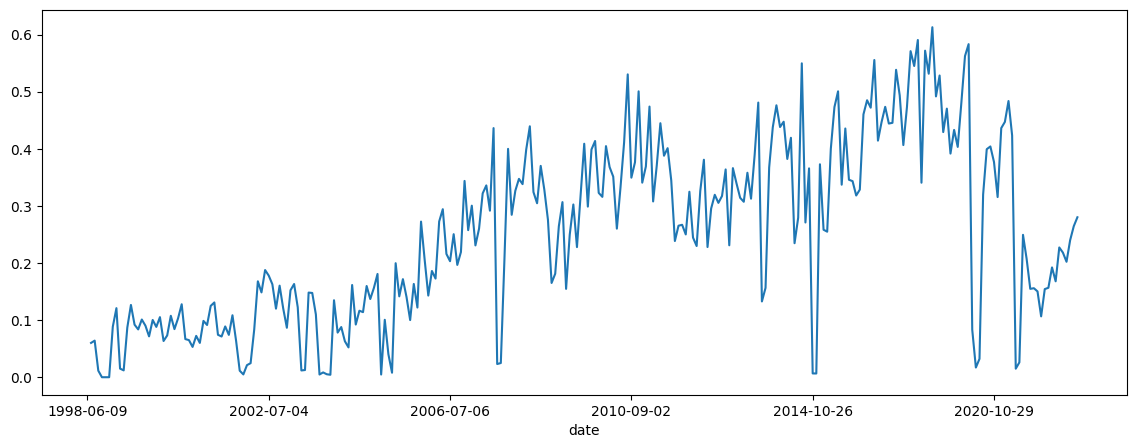

In [168]:
plt.figure(figsize=(14,5))
df_conf.jaccard_similarity.plot()
plt.show()

# Pessimism Score


In [170]:
df_conf=df_conf.reset_index()

# Plotting


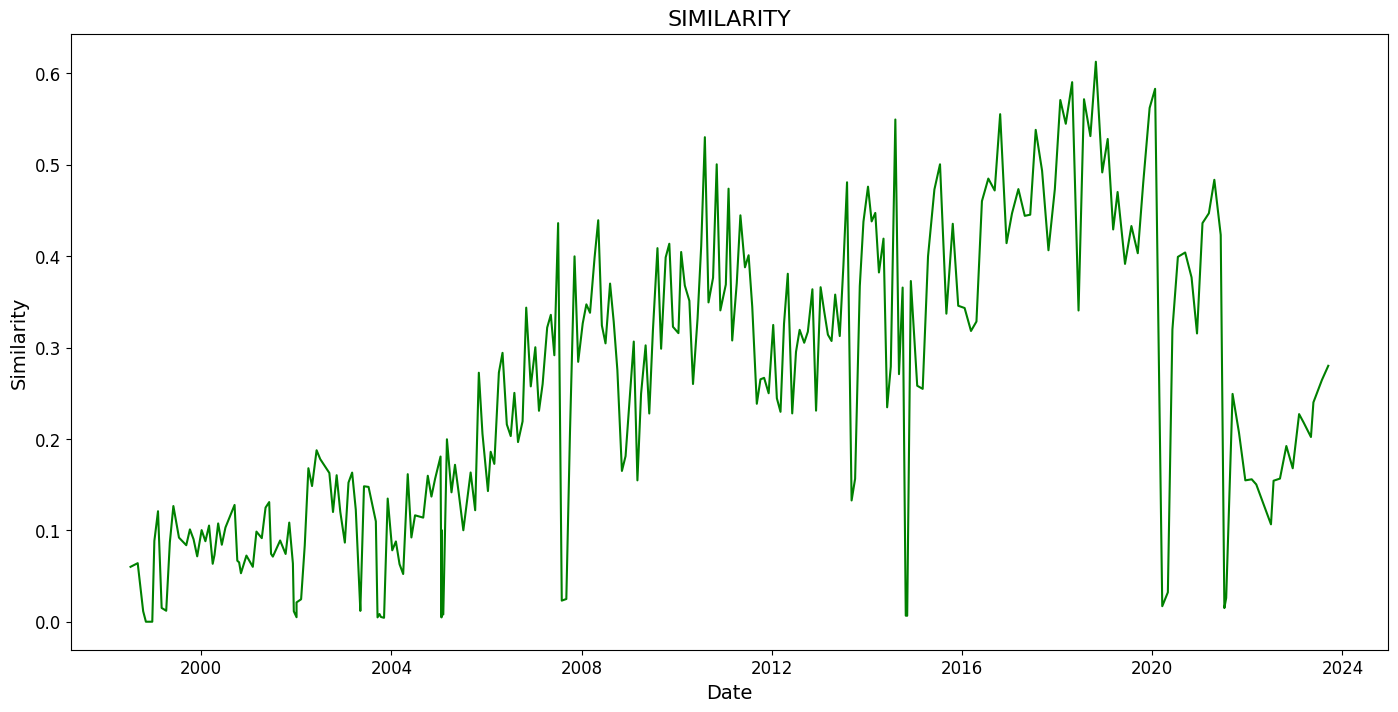

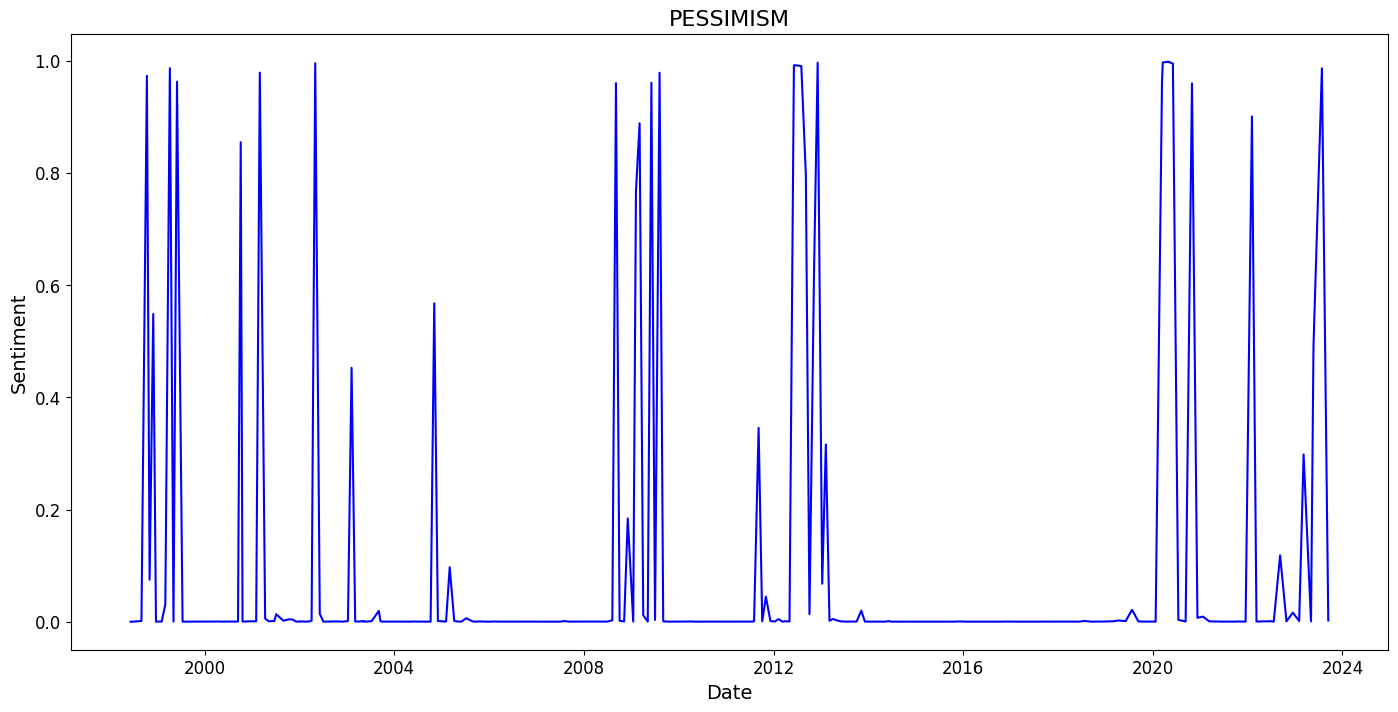

In [171]:
# plotting function to be applied to every measure
df_conf.rename(columns={'date': 'Date'}, inplace=True)
def plot_result(df, x, y, title, xlabel, ylabel, color):
    # Create a figure and set the size
    plt.figure(figsize=(17, 8))

    # Plot the specified columns using the specified color
    plt.plot(df[x], df[y], color=color)

    # Add a title and axis labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.grid()

    # Show the plot
    plt.show()


# Convert 'date' column to datetime format in date_2 just for visualisation
df_conf['date_2'] = pd.to_datetime(df_conf['Date'])


#plot  similarity
plot_result(df_conf, 'date_2', 'jaccard_similarity', 'SIMILARITY', 'Date', 'Similarity', 'green')
# plot sentiment_2 which the one used in the paper
plot_result(df_conf, 'date_2', 'pessimism', 'PESSIMISM', 'Date', 'Sentiment', 'blue')
#plot pessimism 1
#plot_result(df_conf, 'date_2', 'pessimism', 'PESSIMISM', 'Date', 'Sentiment', 'teal')


## builiding the diff time variable  (days since the first speech)

In [172]:
from datetime import datetime

def days_since_1999(date):
    start_date = datetime(1998, 6, 9)
    end_date = date
    return (end_date - start_date).days


dt = [days_since_1999(i) for i in df_conf['date_2']]
df_conf['diff'] = dt


reg_df = df_conf[['Date', 'jaccard_similarity', 'pessimism' ,'diff']]
reg_df = reg_df.rename(columns={'date': 'Date'})

reg_df

,Date,jaccard_similarity,pessimism,diff
0,1998-06-09,NaN,0.000075,0
1,1998-07-08,0.060071,0.000334,29
2,1998-09-01,0.064062,0.001494,84
3,1998-10-13,0.011471,0.972774,126
4,1998-11-03,0.000000,0.074991,147
...,...,...,...,...
269,2023-03-08,0.218195,0.298129,9038
270,2023-05-04,0.202136,0.000612,9095
271,2023-05-23,0.240066,0.490207,9114
272,2023-07-27,0.264469,0.986191,9179


In [173]:
df_eurostock = pd.read_excel('MSCI EURO.xlsx')[['Date','Price']].sort_values(by='Date')
df_eurostock['Date'] = pd.to_datetime(df_eurostock['Date'], format='%d/%m/%Y')
df_eurostock['last'] = list(map(lambda x: np.log(x), df_eurostock['Price']))
df_eurostock['pct_change'] = np.NaN
df_eurostock['pct_change'] = df_eurostock['last'].diff(1)

In [174]:
df_eurostock.tail(40)
df_eurostock.dropna(inplace=True)
df_eurostock_to_np = df_eurostock['pct_change'].to_numpy()
df_eurostock

,Date,Price,last,pct_change
7011,1997-01-01,549.766000,6.309493,0.000000
7010,1997-01-02,540.659000,6.292789,-0.016704
7009,1997-01-03,545.842000,6.302330,0.009541
7008,1997-01-06,549.316000,6.308674,0.006344
7007,1997-01-07,549.231000,6.308519,-0.000155
...,...,...,...,...
4,2023-11-10,1371.655134,7.223773,-0.007365
3,2023-11-13,1381.763593,7.231116,0.007343
2,2023-11-14,1402.400629,7.245941,0.014825
1,2023-11-15,1409.783286,7.251191,0.005250


# GETTING EUROSTOCK DATA

In [175]:



window_value_abnormal_return = {}
window_value_car = {}

df_eurostock['cumulate'] = np.NaN
df_eurostock['CAR'] = np.NaN

 
for n in (range(len(df_eurostock_to_np))):
    x = df_eurostock_to_np[n-251:n-50]
    window_value_abnormal_return[n] = 1/201*(np.sum(x))
liste_cumu = list(window_value_abnormal_return.values())
df_eurostock.cumulate = liste_cumu
df_eurostock['abnormal_return'] = np.NaN

 
df_eurostock['abnormal_return'] = df_eurostock['pct_change'] - df_eurostock['cumulate']
df_eurostock_car_to_np = df_eurostock['abnormal_return'].to_numpy()

#  Computation of cumulative abnormal returns via the same method used above
for n in (range(len(df_eurostock_car_to_np))):
    x = df_eurostock_car_to_np[n-6:n+5]
    window_value_car[n] = np.sum(x)
liste_car= list(window_value_car.values())
df_eurostock.CAR = liste_car

df_eurostock['Date'] = df_eurostock['Date'].astype('datetime64[ns]')
df_eurostock.rename(columns = {'last':'eurostock_last','pct_change':'eurostock_pct_change','cumulate':'eurostock_cumulate',
                               'abnormal_return':'eurostock_abnormal_return', 'CAR':'eurostock_CAR'}, inplace = True)

df_eurostock['Date'] = pd.to_datetime(df_eurostock['Date'], format='%d/%m/%Y')

# retrieving Eurostock CAR results in a new df
df_eurostock_final = df_eurostock.loc[:,['Date', 'eurostock_cumulate', 'eurostock_abnormal_return', 'eurostock_CAR']]
df_eurostock_final

,Date,eurostock_cumulate,eurostock_abnormal_return,eurostock_CAR
7011,1997-01-01,0.000309,-0.000309,0.000000
7010,1997-01-02,0.000297,-0.017001,0.000000
7009,1997-01-03,0.000323,0.009218,0.000000
7008,1997-01-06,0.000333,0.006011,0.000000
7007,1997-01-07,0.000338,-0.000493,0.000000
...,...,...,...,...
4,2023-11-10,0.000421,-0.007787,0.044410
3,2023-11-13,0.000381,0.006962,0.026850
2,2023-11-14,0.000370,0.014455,0.024388
1,2023-11-15,0.000392,0.004858,0.029241


In [176]:
df_hicp = pd.read_excel('Inflation & interest.xlsx')
df_hicp = df_hicp.rename(columns={'Unnamed: 0':'Date'})
df_hicp=df_hicp[['Date','Inflation']].sort_values(by='Date')
df_hicp.head()
df_hicp['Date'] = pd.to_datetime(df_hicp['Date'], format='%m/%Y').dt.strftime('%Y-%m')
df_hicp.Date = df_hicp.Date.apply(lambda x: str(x).replace(x, x+'-01'))
df_hicp['Date'] = df_hicp['Date'].astype('datetime64[ns]')

In [177]:
df_hicp=df_hicp.sort_values(by='Date')
df_hicp

,Date,Inflation
99,1998-12-01,1.358338
98,1999-03-01,0.761581
97,1999-06-01,0.971927
96,1999-09-01,1.167831
95,1999-12-01,1.646059
...,...,...
4,2022-09-01,9.447888
3,2022-12-01,10.058137
2,2023-03-01,8.936144
1,2023-06-01,6.913111


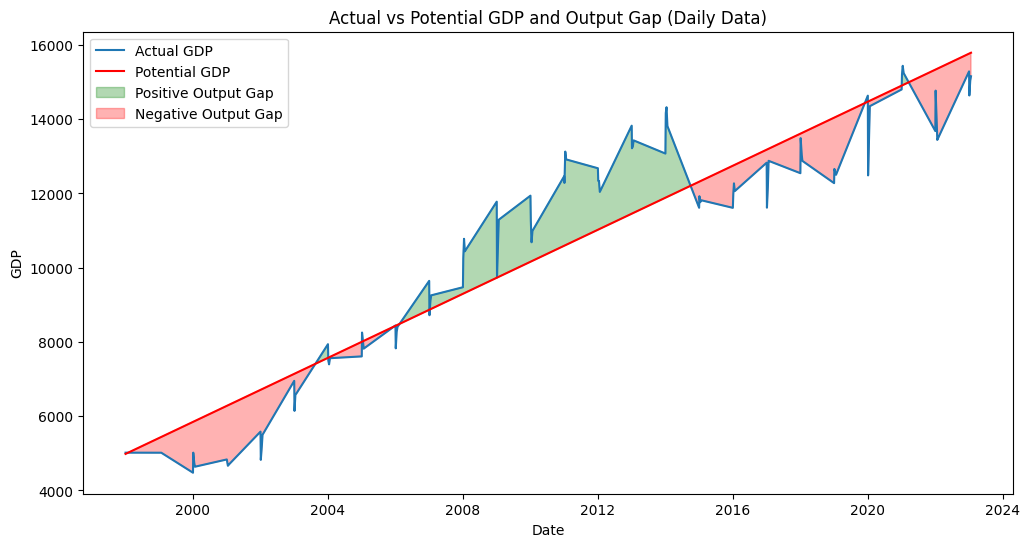

In [178]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
def parse_quarter(string):
    quarter, year = string.split('/')
    month = (int(quarter[1]) - 1) * 3 + 1  # Convert quarter to start month
    return f'{year}-{month:02d}-01'

# Load and preprocess the data
df_gdp_llevel = pd.read_excel('Q GDP LEVEL.xlsx')
df_gdp_llevel['Date'] = df_gdp_llevel['Date'].apply(parse_quarter)
df_gdp_llevel['Date'] = pd.to_datetime(df_gdp_llevel['Date'], format='%Y-%d-%m')
df_gdp_llevel = df_gdp_llevel.set_index('Date')
df_gdp_llevel_daily = df_gdp_llevel['GDPL'].resample('D').mean()
df_gdp_llevel_daily_interpolated = df_gdp_llevel_daily.interpolate(method='linear')

# Fit a linear model to the daily interpolated data
model = LinearRegression()
X = np.arange(len(df_gdp_llevel_daily_interpolated)).reshape(-1, 1)  # Time as a feature
y = df_gdp_llevel_daily_interpolated.values  # GDP values
model.fit(X, y)

# Predict potential GDP on the daily data
potential_gdp_daily = model.predict(X)

# Calculate daily output gap
output_gap_daily = y - potential_gdp_daily

# Create a DataFrame for the results
df_results = pd.DataFrame({
    'Actual GDP': df_gdp_llevel_daily_interpolated,
    'Potential GDP': potential_gdp_daily,
    'Output Gap': output_gap_daily
}, index=df_gdp_llevel_daily_interpolated.index)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_results.index, df_results['Actual GDP'], label='Actual GDP')
plt.plot(df_results.index, df_results['Potential GDP'], label='Potential GDP', color='red')
plt.fill_between(df_results.index, df_results['Actual GDP'], df_results['Potential GDP'], 
                 where=(df_results['Actual GDP'] > df_results['Potential GDP']), 
                 color='green', alpha=0.3, label='Positive Output Gap')
plt.fill_between(df_results.index, df_results['Actual GDP'], df_results['Potential GDP'], 
                 where=(df_results['Actual GDP'] <= df_results['Potential GDP']), 
                 color='red', alpha=0.3, label='Negative Output Gap')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('Actual vs Potential GDP and Output Gap (Daily Data)')
plt.legend()
plt.show()


In [179]:
df_gdp_llevel_daily_interpolated

Date
1998-01-04     5018.907700
1998-01-05     5018.907700
1998-01-06     5018.907700
1998-01-07     5018.907700
1998-01-08     5018.907700
                  ...     
2023-01-21    15098.451328
2023-01-22    15113.028394
2023-01-23    15127.605459
2023-01-24    15142.182525
2023-01-25    15156.759591
Freq: D, Name: GDPL, Length: 9153, dtype: float64

In [180]:
df_gdp_llevel

,GDPL
Date,
2023-01-04,15289.098679
2023-01-25,15156.759591
2023-01-16,15025.566000
2023-01-07,14640.675000
2022-01-04,13680.895000
...,...
1999-01-04,5018.907700
1999-01-25,5018.907700
1999-01-16,5018.907700


In [182]:
df_ogap_daily =df_results['Output Gap']


# Merging all datasets 

In [183]:
 
## Convert monthly to daily for mro
from datetime import datetime
#import monthly and cleaning date columns
df_mro = pd.read_excel('Inflation & interest.xlsx')
df_mro = df_mro.rename(columns={'Unnamed: 0':'Date'})
# Convert the 'Date' column to a datetime format

# Append a default day to each date string and then convert to datetime
df_mro['Date'] = pd.to_datetime(df_mro['Date'].apply(lambda x: str(x) + '-01'), format='%m/%Y-%d')

# Set the 'Date' column as the index
df_mro = df_mro.set_index('Date')

# Resample and interpolate
df_mro_daily = df_mro.resample('D').mean()
df_mro_daily = df_mro_daily.interpolate()

# Reset the index and keep 'Date' as a column


df_mro['Rate'] = df_mro['LTR INT RATE'].astype(float)

#Interpolation to get daily MRO


In [184]:
stri=pd.read_csv('ecb data.csv')
stri=stri.rename(columns={'DATE':'Date'})
#stri['Date'] = pd.to_datetime(stri['Date'], format='%Y-%m-%d')

In [185]:
stri['Date'] = pd.to_datetime(stri['Date'])

In [186]:
stri['diff']= (stri['STR'].diff())

In [187]:
# Assuming 'stri' DataFrame is already defined with the 'STR' column

# Calculating the monthly difference in the 'STR' rate

# Categorizing the differences into the specified ranges
conditions = [
    (stri['diff'] > 0) & (stri['diff'] <= 0.25),
    (stri['diff'] > 0.25) & (stri['diff'] <= 0.5),
    (stri['diff'] > 0.5) & (stri['diff'] <= 0.75),
    (stri['diff'] > 0.75),
    (stri['diff'] < 0) & (stri['diff'] >= -0.25),
    (stri['diff'] < -0.25) & (stri['diff'] >= -0.5),
    (stri['diff'] < -0.5) & (stri['diff'] >= -0.75),
    (stri['diff'] < -0.75)
]

choices = [
    'decrease 0-0.25', 'decrease 0.25-0.5', 'decrease 0.5-0.75', 'decrease below -0.75',
        'increase 0-0.25', 'increase 0.25-0.5', 'increase 0.5-0.75', 'increase above 0.75',

]

stri['diff_category'] = pd.cut(stri['diff'], bins=[-float('inf'), -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, float('inf')], labels=choices, right=False)

# Counting the occurrences in each category
diff_counts_separate = stri['diff_category'].value_counts()

diff_counts_separate


decrease below -0.75    10
increase 0.25-0.5        9
increase 0.5-0.75        6
decrease 0.5-0.75        5
increase 0-0.25          4
increase above 0.75      2
decrease 0.25-0.5        1
decrease 0-0.25          0
Name: diff_category, dtype: int64

In [188]:
stri

,Date,STR,diff,diff_category
0,1999-01-01,3.00,NaN,NaN
1,1999-01-04,3.00,0.00,increase 0-0.25
2,1999-01-22,3.00,0.00,increase 0-0.25
3,1999-04-09,2.50,-0.50,decrease 0.5-0.75
4,1999-11-05,3.00,0.50,increase 0.5-0.75
5,2000-02-04,3.25,0.25,increase 0.25-0.5
6,2000-03-17,3.50,0.25,increase 0.25-0.5
7,2000-04-28,3.75,0.25,increase 0.25-0.5
8,2000-06-09,4.25,0.50,increase 0.5-0.75
9,2008-10-15,3.75,-0.50,decrease 0.5-0.75


In [189]:
stri['Year'] = stri.Date.dt.year

# Grouping by year and diff_category, then counting occurrences
yearly_diff_counts = stri.groupby(['Year', 'diff_category']).size().unstack(fill_value=0)

yearly_diff_counts

diff_category,decrease 0-0.25,decrease 0.25-0.5,decrease 0.5-0.75,decrease below -0.75,increase 0-0.25,increase 0.25-0.5,increase 0.5-0.75,increase above 0.75
Year,,,,,,,,
1999,0,0,1,0,2,0,1,0
2000,0,0,0,0,0,3,1,0
2008,0,1,2,0,0,0,0,0
2009,0,0,2,2,0,0,0,0
2011,0,0,0,2,0,2,0,0
2012,0,0,0,1,0,0,0,0
2013,0,0,0,2,0,0,0,0
2014,0,0,0,2,0,0,0,0
2015,0,0,0,0,1,0,0,0


In [190]:
yearly_diff_counts.to_excel('Table 1.xlsx')

In [191]:
yearly_diff_counts

diff_category,decrease 0-0.25,decrease 0.25-0.5,decrease 0.5-0.75,decrease below -0.75,increase 0-0.25,increase 0.25-0.5,increase 0.5-0.75,increase above 0.75
Year,,,,,,,,
1999,0,0,1,0,2,0,1,0
2000,0,0,0,0,0,3,1,0
2008,0,1,2,0,0,0,0,0
2009,0,0,2,2,0,0,0,0
2011,0,0,0,2,0,2,0,0
2012,0,0,0,1,0,0,0,0
2013,0,0,0,2,0,0,0,0
2014,0,0,0,2,0,0,0,0
2015,0,0,0,0,1,0,0,0


In [192]:
stri = stri.set_index('Date')
stri_daily = stri.drop(['diff','diff_category','Year'],axis=1).resample('D').mean()
stri_daily = stri_daily.interpolate()


In [194]:
stri_daily

,STR
Date,
1999-01-01,3.000000
1999-01-02,3.000000
1999-01-03,3.000000
1999-01-04,3.000000
1999-01-05,3.000000
...,...
2023-09-16,4.479592
2023-09-17,4.484694
2023-09-18,4.489796


In [195]:
stri_daily['STR']=stri_daily['STR'].astype('float')

In [196]:
stri_daily

,STR
Date,
1999-01-01,3.000000
1999-01-02,3.000000
1999-01-03,3.000000
1999-01-04,3.000000
1999-01-05,3.000000
...,...
2023-09-16,4.479592
2023-09-17,4.484694
2023-09-18,4.489796


In [197]:
df_mro_daily=df_mro_daily.reset_index()

In [198]:
df_mro_daily

,Date,Inflation,LTR INT RATE
0,1998-12-01,1.358338,4.278732
1,1998-12-02,1.351708,4.276394
2,1998-12-03,1.345077,4.274057
3,1998-12-04,1.338446,4.271719
4,1998-12-05,1.331816,4.269382
...,...,...,...
9036,2023-08-28,5.476246,3.394072
9037,2023-08-29,5.459918,3.395730
9038,2023-08-30,5.443590,3.397387
9039,2023-08-31,5.427262,3.399044


In [199]:
df_ogap_daily

Date
1998-01-04     33.248851
1998-01-05     32.068087
1998-01-06     30.887323
1998-01-07     29.706560
1998-01-08     28.525796
                 ...    
2023-01-21   -688.832827
2023-01-22   -675.436525
2023-01-23   -662.040222
2023-01-24   -648.643920
2023-01-25   -635.247618
Freq: D, Name: Output Gap, Length: 9153, dtype: float64

In [200]:
df_ogap_daily=pd.DataFrame(df_ogap_daily, columns=[ 'Output Gap'])

In [201]:
df_ogap_daily=df_ogap_daily.reset_index()

In [202]:
## Create date column and convert it to dataframe
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

date_ = []
start_dt = date(1998, 12, 1)
end_dt = date(2023, 10, 26)
for dt in daterange(start_dt, end_dt):
    date_.append(dt.strftime("%Y-%m-%d"))
df_date = pd.DataFrame(date_, columns=['Date'])
df_date['Date'] = df_date['Date'].astype('datetime64[ns]')

In [203]:
df_mro_daily=df_mro_daily
df_mro_daily

,Date,Inflation,LTR INT RATE
0,1998-12-01,1.358338,4.278732
1,1998-12-02,1.351708,4.276394
2,1998-12-03,1.345077,4.274057
3,1998-12-04,1.338446,4.271719
4,1998-12-05,1.331816,4.269382
...,...,...,...
9036,2023-08-28,5.476246,3.394072
9037,2023-08-29,5.459918,3.395730
9038,2023-08-30,5.443590,3.397387
9039,2023-08-31,5.427262,3.399044


In [204]:
stri_daily=stri_daily.reset_index()


In [205]:
import warnings
warnings.filterwarnings("ignore")

## join date col & reg_df
df_not_clean = pd.merge(df_date,df_eurostock_final,how='left',on=['Date'])
df_not_clean_2 = pd.merge(df_not_clean,df_ogap_daily,how='left',on=['Date'])
df_not_clean_3 = pd.merge(df_not_clean_2,df_mro_daily,how='left',on=['Date'])
df_not_clean_4=df_not_clean_3.merge(stri_daily, on='Date',how='left')
df_conf.rename(columns={'date':'Date'}, inplace=True)
df_conf['Date'] = df_conf['Date'].astype('datetime64[ns]')

df_final_not_clean = pd.merge(df_not_clean_4,df_conf,how='left',on=['Date'])

df_final_not_clean.set_index('Date', inplace=True)
df_final_not_clean.dropna(axis = 0, how = 'all', inplace = True)
df_final_not_clean.reset_index(inplace=True)

# Interpolate our variables with a daily granularity
df_final_not_clean.HICP = df_final_not_clean['Inflation'].interpolate()
df_final_not_clean.output_gap = df_final_not_clean['Output Gap'].interpolate()
df_final_not_clean.mro = df_final_not_clean['STR'].interpolate()


df_final_not_clean = df_final_not_clean [['Date', 'eurostock_cumulate', 'eurostock_abnormal_return',
       'eurostock_CAR', 'Inflation', 'Output Gap', 'STR',

       'jaccard_similarity', 'pessimism', 'date_2', 'diff']]
df_final_not_clean.drop_duplicates(subset=['jaccard_similarity','diff'], inplace=True)

#Calculating MRO returns
df_final_not_clean['change_MRO_Rate'] = df_final_not_clean['STR'].diff(1)

#Calculating log for similarity and for Time variable (log_diff)
df_final_not_clean['log_similarity'] = np.log(df_final_not_clean['jaccard_similarity'])
df_final_not_clean['log_diff'] = np.log(df_final_not_clean['diff'].values)

# filling in the remaining missing data w/ latest value
df_final_not_clean.eurostock_cumulate.ffill(inplace=True)
df_final_not_clean.eurostock_abnormal_return.ffill(inplace=True)
df_final_not_clean.eurostock_CAR.ffill(inplace=True)


df_final_not_clean.reset_index(inplace=True, drop=True)
df_final_not_clean = df_final_not_clean[df_final_not_clean.Date > '1998-12-31']
df_final_not_clean

,Date,eurostock_cumulate,eurostock_abnormal_return,eurostock_CAR,Inflation,Output Gap,STR,jaccard_similarity,pessimism,date_2,diff,change_MRO_Rate,log_similarity,log_diff
3,1999-01-07,0.000444,-0.016597,-0.025643,1.113005,-401.272150,3.000000,0.088464,0.000376,1999-01-07,212.0,NaN,-2.425165,5.356586
4,1999-02-04,0.000563,-0.001802,-0.033480,0.927347,-450.037932,2.915584,0.120927,0.000291,1999-02-04,240.0,-0.084416,-2.112569,5.480639
5,1999-03-04,0.000270,0.011865,-0.018795,0.768440,-527.071635,2.733766,0.015087,0.031109,1999-03-04,268.0,-0.181818,-4.193907,5.590987
6,1999-04-08,-0.000043,0.000567,0.039784,0.848463,-623.363765,2.506494,0.012000,0.986361,1999-04-08,303.0,-0.227273,-4.422849,5.713733
7,1999-05-06,0.000121,-0.003924,-0.017575,0.912481,-700.397469,2.564286,0.086957,0.000354,1999-05-06,331.0,0.057792,-2.442347,5.802118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2023-03-08,-0.000180,0.002073,-0.014897,8.782218,NaN,3.333333,0.218195,0.298129,2023-03-08,9038.0,0.394558,-1.522365,9.109193
266,2023-05-04,0.000528,-0.005958,-0.020587,7.528816,NaN,3.719388,0.202136,0.000612,2023-05-04,9095.0,0.386054,-1.598813,9.115480
267,2023-05-23,0.000301,-0.008916,-0.008130,7.111016,NaN,3.827381,0.240066,0.490207,2023-05-23,9114.0,0.107993,-1.426840,9.117567
268,2023-07-27,0.000646,0.019623,-0.014460,5.998742,NaN,4.214286,0.264469,0.986191,2023-07-27,9179.0,0.386905,-1.330030,9.124674


In [206]:
df_final_not_clean.columns

Index(['Date', 'eurostock_cumulate', 'eurostock_abnormal_return',
       'eurostock_CAR', 'Inflation', 'Output Gap', 'STR', 'jaccard_similarity',
       'pessimism', 'date_2', 'diff', 'change_MRO_Rate', 'log_similarity',
       'log_diff'],
      dtype='object')

In [207]:
df_not_clean_4

,Date,eurostock_cumulate,eurostock_abnormal_return,eurostock_CAR,Output Gap,Inflation,LTR INT RATE,STR
0,1998-12-01,0.000524,-0.041257,-0.022712,-357.583897,1.358338,4.278732,NaN
1,1998-12-02,0.000642,-0.012540,-0.038966,-358.764661,1.351708,4.276394,NaN
2,1998-12-03,0.000693,0.015776,-0.028780,-359.945424,1.345077,4.274057,NaN
3,1998-12-04,0.000610,0.004925,-0.033301,-361.126188,1.338446,4.271719,NaN
4,1998-12-05,NaN,NaN,NaN,-362.306952,1.331816,4.269382,NaN
...,...,...,...,...,...,...,...,...
9091,2023-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9092,2023-10-23,0.000880,0.002257,-0.052852,NaN,NaN,NaN,NaN
9093,2023-10-24,0.000766,0.005339,-0.034758,NaN,NaN,NaN,NaN
9094,2023-10-25,0.000700,0.001583,-0.028497,NaN,NaN,NaN,NaN


In [208]:
df_not_clean

,Date,eurostock_cumulate,eurostock_abnormal_return,eurostock_CAR
0,1998-12-01,0.000524,-0.041257,-0.022712
1,1998-12-02,0.000642,-0.012540,-0.038966
2,1998-12-03,0.000693,0.015776,-0.028780
3,1998-12-04,0.000610,0.004925,-0.033301
4,1998-12-05,NaN,NaN,NaN
...,...,...,...,...
9091,2023-10-22,NaN,NaN,NaN
9092,2023-10-23,0.000880,0.002257,-0.052852
9093,2023-10-24,0.000766,0.005339,-0.034758
9094,2023-10-25,0.000700,0.001583,-0.028497


# Regression part of original paper (replication of results)

In [212]:
 
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

#Creating a new df with replicate data
df_replicate = df_final_not_clean.ffill()

#exlude first row to avoid na
df_replicate = df_replicate.iloc[2:]

# fit linear regression
def fit_linear_regression(y,x):
    # Add a constant to the predictor variables
    x = sm.add_constant(x)

    # Fit a linear regression model
    model = sm.OLS(y, x).fit()

    # View the model summary
    print(model.summary())

    return model

# REPLICATING REGRESSION RESULTS OF TABLE 3 (in original paper)


In [213]:

fit_linear_regression(df_replicate['log_similarity'].dropna(), df_replicate[['Output Gap', 'Inflation', 'change_MRO_Rate']].dropna())

fit_linear_regression(df_replicate['log_similarity'].dropna(), df_replicate['log_diff'].dropna())

fit_linear_regression(df_replicate['log_similarity'].dropna(), df_replicate[['log_diff','Inflation', 'Output Gap', 'change_MRO_Rate']].dropna())

fit_linear_regression(df_replicate['log_similarity'].dropna(), df_replicate[['diff','Output Gap', 'Inflation', 'change_MRO_Rate']].dropna())


                            OLS Regression Results                            
Dep. Variable:         log_similarity   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     12.49
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.17e-07
Time:                        15:50:38   Log-Likelihood:                -369.64
No. Observations:                 265   AIC:                             747.3
Df Residuals:                     261   BIC:                             761.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5282      0.110    -

In [214]:
# Creating a dataframe to summarize the new OLS regression results
new_ols_data = {
    "Model": ["(1)", "(2)", "(3)", "(4)"],
    "Adj. R-squared": [0.116, 0.278, 0.300, 0.116],
    "const coef": [-1.5282, -7.4334, -6.8601, -1.5282],
    "const P>|t|": [0.000, 0.000, 0.000, 0.000],
    "log_diff coef": ["N/A", 0.7041, 0.6318, "N/A"],
    "log_diff P>|t|": ["N/A", 0.000, 0.000, "N/A"],
    "Output Gap coef": [0.0003, "N/A", 0.0002, 0.0003],
    "Output Gap P>|t|": [0.000, "N/A", 0.002, 0.000],
    "Inflation coef": [-0.0972, "N/A", "N/A", -0.0972],
    "Inflation P>|t|": [0.025, "N/A", "N/A", 0.025],
    "change_MRO_Rate coef": [1.4852, "N/A", 0.0912, 1.4852],
    "change_MRO_Rate P>|t|": [0.016, "N/A", 0.848, 0.016]
}

# Convert the dictionary into a DataFrame
new_ols_regression_comparison = pd.DataFrame(new_ols_data)
new_ols_regression_comparison.to_excel('TABLE 3 commune aux deux modèles.xlsx')



In [215]:

#calculating CAR absolute value
df_replicate['CAR_abs'] = df_replicate['eurostock_CAR'].abs()
#calculating interaction
df_replicate['interaction'] = df_replicate['pessimism'] * df_replicate['jaccard_similarity']

# We didn't include the Time (count) variable below

# REPLICATING REGRESSION RESULTS OF TABLE 4 (in original paper)

fit_linear_regression(df_replicate['CAR_abs'].dropna(), df_replicate[['pessimism']].dropna())

fit_linear_regression(df_replicate['CAR_abs'].dropna(), df_replicate[['Output Gap', 'Inflation', 'change_MRO_Rate']].dropna())

fit_linear_regression(df_replicate['CAR_abs'].dropna(), df_replicate[['interaction']].dropna())

fit_linear_regression(df_replicate['CAR_abs'].dropna(), df_replicate[['interaction', 'Output Gap', 'Inflation', 'change_MRO_Rate']].dropna())
fit_linear_regression(df_replicate['CAR_abs'].dropna(), df_replicate[['interaction', 'Output Gap', 'Inflation']].dropna())

                            OLS Regression Results                            
Dep. Variable:                CAR_abs   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     8.454
Date:                Fri, 05 Jan 2024   Prob (F-statistic):            0.00395
Time:                        15:50:39   Log-Likelihood:                 520.10
No. Observations:                 265   AIC:                            -1036.
Df Residuals:                     263   BIC:                            -1029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0294      0.002     13.268      0.0

In [219]:
# Adding the new OLS regression results to the dataframe
new_data = {
    "Model": ["(6)", "(7)", "(8)", "(9)", "(10)"],
    "Adj. R-squared": [0.027, 0.006, 0.007, 0.011, 0.004],
    "const coef": [0.0294, 0.0305, 0.0305, 0.0298, 0.0323],
    "const P>|t|": [0.000, 0.000, 0.000, 0.000, 0.000],
    "pessimism coef": [0.0227, "N/A", "N/A", "N/A", "N/A"],
    "pessimism P>|t|": [0.004, "N/A", "N/A", "N/A", "N/A"],
    "interaction coef": ["N/A", "N/A", 0.0542, 0.0505, 0.0494],
    "interaction P>|t|": ["N/A", "N/A", 0.100, 0.133, 0.142],
    "Output Gap coef": ["N/A", 1.323e-06, "N/A", 6.8e-07, 1.518e-06],
    "Output Gap P>|t|": ["N/A", 0.508, "N/A", 0.738, 0.444],
    "Inflation coef": ["N/A", 0.0005, "N/A", 0.0004, -0.0009],
    "Inflation P>|t|": ["N/A", 0.721, "N/A", 0.771, 0.514],
    "change_MRO_Rate coef": ["N/A", -0.0356, "N/A", -0.0362, "N/A"],
    "change_MRO_Rate P>|t|": ["N/A", 0.098, "N/A", 0.092, "N/A"],
}

# Convert the dictionary into a DataFrame
new_regression_comparison = pd.DataFrame(new_data)

new_regression_comparison


,Model,Adj. R-squared,const coef,const P>|t|,pessimism coef,pessimism P>|t|,interaction coef,interaction P>|t|,Output Gap coef,Output Gap P>|t|,Inflation coef,Inflation P>|t|,change_MRO_Rate coef,change_MRO_Rate P>|t|
0,(6),0.027,0.0294,0.0,0.0227,0.004,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,(7),0.006,0.0305,0.0,N/A,N/A,N/A,N/A,0.000001,0.508,0.0005,0.721,-0.0356,0.098
2,(8),0.007,0.0305,0.0,N/A,N/A,0.0542,0.1,N/A,N/A,N/A,N/A,N/A,N/A
3,(9),0.011,0.0298,0.0,N/A,N/A,0.0505,0.133,0.000001,0.738,0.0004,0.771,-0.0362,0.092
4,(10),0.004,0.0323,0.0,N/A,N/A,0.0494,0.142,0.000002,0.444,-0.0009,0.514,N/A,N/A


In [220]:
new_regression_comparison.to_excel('Table 4 with BERT model.xlsx')

# Extension part of original paper  


In [221]:
 
df_final = df_final_not_clean.iloc[2:]
 

# Get the last row
last_row = df_final.tail(1)

# Drop the last row
df_final = df_final.drop(last_row.index)

# EXTENDING REGRESSION RESULTS OF TABLE 3

fit_linear_regression(df_final['log_similarity'].ffill(), df_final[['Output Gap', 'Inflation', 'change_MRO_Rate']].ffill())

fit_linear_regression(df_final['log_similarity'].ffill(), df_final['log_diff'].ffill())

fit_linear_regression(df_final['log_similarity'].ffill(), df_final[['log_diff']].ffill())

fit_linear_regression(df_final['log_similarity'].ffill(), df_final[['Inflation']].ffill())


                            OLS Regression Results                            
Dep. Variable:         log_similarity   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     12.55
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.09e-07
Time:                        15:50:45   Log-Likelihood:                -368.52
No. Observations:                 264   AIC:                             745.0
Df Residuals:                     260   BIC:                             759.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5250      0.110    -

In [222]:
import pandas as pd

# Creating a dataframe to hold the comparison of OLS regression results
data = {
    "Model": ["(1)", "(2)", "(3)", "(4)", ],
    "Adj. R-squared": [0.027, 0.006, 0.007, 0.011],
  
    "const coef": [0.0294, 0.0305, 0.0305, 0.0298,],
    "const P>|t|": [0.000, 0.000, 0.000, 0.000],
    "pessimism coef": [0.0227, "N/A", "N/A", "N/A"],
    "pessimism P>|t|": [0.004, "N/A", "N/A", "N/A"],
    "Output Gap coef": ["N/A", 1.323e-06, "N/A", 6.8e-07],
    "Output Gap P>|t|": ["N/A", 0.508, "N/A", 0.738],
    "Inflation coef": ["N/A", 0.0005, "N/A", 0.0004],
    "Inflation P>|t|": ["N/A", 0.721, "N/A", 0.771, ],
    "change_MRO_Rate coef": ["N/A", -0.0356, "N/A", -0.0362],
    "change_MRO_Rate P>|t|": ["N/A", 0.098, "N/A", 0.092],
}

# Convert the dictionary into a DataFrame
regression_comparison = pd.DataFrame(data)
regression_comparison


,Model,Adj. R-squared,const coef,const P>|t|,pessimism coef,pessimism P>|t|,Output Gap coef,Output Gap P>|t|,Inflation coef,Inflation P>|t|,change_MRO_Rate coef,change_MRO_Rate P>|t|
0,(1),0.027,0.0294,0.0,0.0227,0.004,N/A,N/A,N/A,N/A,N/A,N/A
1,(2),0.006,0.0305,0.0,N/A,N/A,0.000001,0.508,0.0005,0.721,-0.0356,0.098
2,(3),0.007,0.0305,0.0,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,(4),0.011,0.0298,0.0,N/A,N/A,0.000001,0.738,0.0004,0.771,-0.0362,0.092


In [225]:
regression_comparison

,Model,Adj. R-squared,const coef,const P>|t|,pessimism coef,pessimism P>|t|,Output Gap coef,Output Gap P>|t|,Inflation coef,Inflation P>|t|,change_MRO_Rate coef,change_MRO_Rate P>|t|
0,(1),0.027,0.0294,0.0,0.0227,0.004,N/A,N/A,N/A,N/A,N/A,N/A
1,(2),0.006,0.0305,0.0,N/A,N/A,0.000001,0.508,0.0005,0.721,-0.0356,0.098
2,(3),0.007,0.0305,0.0,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,(4),0.011,0.0298,0.0,N/A,N/A,0.000001,0.738,0.0004,0.771,-0.0362,0.092


# EXTENDING REGRESSION RESULTS OF TABLE 4



In [224]:
#calculating CAR absolute value
df_final['CAR_abs'] = df_final['eurostock_CAR'].abs()
#calculating interaction
df_final['interaction'] = df_final['pessimism'] * df_final['jaccard_similarity'] 

# EXTENDING REGRESSION RESULTS OF TABLE 4
print('m1 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
m1 = fit_linear_regression(df_final['CAR_abs'].ffill(), df_final[['pessimism']].ffill())
print('m2 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
m2 = fit_linear_regression(df_final['CAR_abs'].ffill(), df_final[['Output Gap', 'Inflation', 'change_MRO_Rate']].ffill())
print('m3 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
m3 = fit_linear_regression(df_final['CAR_abs'].ffill(), df_final[['interaction']].ffill())
print('m4 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
m4 = fit_linear_regression(df_final['CAR_abs'].ffill(), df_final[['interaction', 'Output Gap', 'Inflation', 'change_MRO_Rate']].ffill())
print('m5 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
m5 = fit_linear_regression(df_final['CAR_abs'].ffill(), df_final[['interaction', 'Output Gap', 'Inflation', 'pessimism']].ffill())


m1 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                CAR_abs   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     8.357
Date:                Fri, 05 Jan 2024   Prob (F-statistic):            0.00416
Time:                        15:50:46   Log-Likelihood:                 517.83
No. Observations:                 264   AIC:                            -1032.
Df Residuals:                     262   BIC:                            -1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
     

In [131]:
# Adding the new OLS regression results (m1 to m5) to the dataframe
new_data_6 = {
    "Model": ["15", "16", "17", "18", "19"],
    "Adj. R-squared": [0.027, 0.005, 0.006, 0.010, 0.033],
    "const coef": [0.0295, 0.0304, 0.0306, 0.0297, 0.0310],
    "const P>|t|": [0.000, 0.000, 0.000, 0.000, 0.000],
    "pessimism coef": [0.0226, "N/A", "N/A", "N/A", 0.0453],
    "pessimism P>|t|": [0.004, "N/A", "N/A", "N/A", 0.003],
    "interaction coef": ["N/A", "N/A", 0.0538, 0.0502, -0.1147],
    "interaction P>|t|": ["N/A", "N/A", 0.102, 0.136, 0.074],
    "Output Gap coef": ["N/A", 1.325e-06, "N/A", 6.86e-07, 2.343e-06],
    "Output Gap P>|t|": ["N/A", 0.507, "N/A", 0.737, 0.236],
    "Inflation coef": ["N/A", 0.0006, "N/A", 0.0005, -0.0007],
    "Inflation P>|t|": ["N/A", 0.693, "N/A", 0.744, 0.590],
    "change_MRO_Rate coef": ["N/A", -0.0350, "N/A", -0.0356, "N/A"],
    "change_MRO_Rate P>|t|": ["N/A", 0.104, "N/A", 0.098, "N/A"]
}

# Convert the dictionary into a DataFrame and concatenate with the previous data
new_regression_comparison_6 = pd.DataFrame(new_data_6)



In [132]:
new_regression_comparison_6.to_excel('Table 4 extension BERT.xlsx')

new_regression_comparison_6

# *****************************SUMMARY STATISTICS*****************************


In [70]:

def summarize_dataframe(df):
    summary = df.describe().T
    summary = summary[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    return summary

summary = summarize_dataframe(df_final)
summary

,mean,std,min,25%,50%,75%,max
eurostock_cumulate,2.628157e-05,9.473599e-04,-3.435881e-03,-5.206542e-04,2.058181e-04,6.763732e-04,1.921724e-03
eurostock_abnormal_return,-1.003027e-03,1.719007e-02,-1.345848e-01,-7.283255e-03,6.848895e-04,7.385379e-03,5.579062e-02
eurostock_CAR,1.904759e-03,4.692732e-02,-3.553541e-01,-1.629400e-02,5.995496e-03,2.665089e-02,1.134261e-01
Inflation,2.147691e+00,1.640899e+00,-1.282159e-01,1.323364e+00,2.054937e+00,2.536062e+00,9.883605e+00
Output Gap,1.019507e+02,1.122295e+03,-1.880571e+03,-7.916532e+02,-1.138782e+02,1.228464e+03,2.295614e+03
STR,2.116314e+00,1.736169e+00,0.000000e+00,2.739693e-01,1.468649e+00,3.947500e+00,4.245574e+00
jaccard_similarity,2.552492e-01,1.551708e-01,4.296455e-03,1.215493e-01,2.561728e-01,3.737177e-01,6.128134e-01
pessimism,9.395711e-02,2.697351e-01,6.774279e-05,2.231777e-04,3.444786e-04,1.278212e-03,9.978961e-01
diff,4.334515e+03,2.487548e+03,2.680000e+02,2.207000e+03,4.181000e+03,6.213750e+03,9.179000e+03
change_MRO_Rate,4.919323e-03,1.196206e-01,-6.964286e-01,-5.737705e-03,-4.590164e-03,9.690796e-03,7.500000e-01


In [71]:
summary.to_excel('Summary table BERT.xlsx')

# Capture non-linearity

In [140]:
  
def square_column(df, col):
    df['square_' + col] = df[col] ** 2

#apply var² on Time var (diff)
square_column(df_final, 'diff')

# after ² we apply log
df_final['log_square_diff'] = np.log(df_final['square_diff'])

#apply var² to Similarity
square_column(df_final, 'jaccard_similarity')

#apply var² to INFLATION
square_column(df_final, 'Inflation')
 
def fit_linear_regression_nc(y,x):

    # Fit a linear regression model
    model = sm.OLS(y, x).fit()

    # View the model summary
    print(model.summary())

    return model

# CAPTURING NON-LINEARITY ON SIMILARITY & INFLATION


In [136]:
m1 = fit_linear_regression(df_final['log_similarity'].ffill(), df_final[['log_diff', 'log_square_diff']].ffill())

m2 = fit_linear_regression(df_final['log_similarity'].ffill(), df_final[['square_Inflation', 'Inflation']].ffill())

                            OLS Regression Results                            
Dep. Variable:         log_similarity   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     102.0
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.80e-20
Time:                        13:00:20   Log-Likelihood:                -342.96
No. Observations:                 264   AIC:                             689.9
Df Residuals:                     262   BIC:                             697.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.4457      0.571    -

In [138]:
# Adding the new OLS regression results to the dataframe
new_data_7 = {
    "Model": ["20", "21"],
    "Adj. R-squared": [0.278, 0.043],
    "const coef": [-7.4457, -1.1765],
    "const P>|t|": [0.000, 0.000],
    "log_diff coef": [0.1411, "N/A"],
    "log_diff P>|t|": [0.000, "N/A"],
    "log_square_diff coef": [0.2823, "N/A"],
    "log_square_diff P>|t|": [0.000, "N/A"],
    "square_Inflation coef": ["N/A", 0.0345],
    "square_Inflation P>|t|": ["N/A", 0.002],
    "Inflation coef": ["N/A", -0.3625],
    "Inflation P>|t|": ["N/A", 0.000]
}

# Convert the dictionary into a DataFrame and concatenate with the previous data
new_regression_comparison_7 = pd.DataFrame(new_data_7)
new_regression_comparison_7.to_excel('Table 5 similarity with non-linearity.xlsx')


In [143]:
df_final.columns

Index(['Date', 'eurostock_cumulate', 'eurostock_abnormal_return',
       'eurostock_CAR', 'Inflation', 'Output Gap', 'STR', 'jaccard_similarity',
       'pessimism', 'date_2', 'diff', 'change_MRO_Rate', 'log_similarity',
       'log_diff', 'square_diff', 'log_square_diff',
       'square_jaccard_similarity', 'square_Inflation'],
      dtype='object')

# CAPTURING NON-LINEARITY ON 


In [145]:
m1 = fit_linear_regression(df_final['log_similarity'].ffill(), df_final[['log_diff', 'log_square_diff']].ffill())

m2 = fit_linear_regression(df_final['log_similarity'].ffill(), df_final[['square_Inflation', 'Inflation']].ffill())
m3 = fit_linear_regression_nc(df_final['CAR_abs'].ffill(), df_final[['jaccard_similarity', 'square_jaccard_similarity']].ffill())
# w/o constant
m4 = fit_linear_regression_nc(df_final['CAR_abs'].ffill(), df_final[['interaction',  'jaccard_similarity', 'square_jaccard_similarity']].ffill())
m5 = fit_linear_regression(df_final['CAR_abs'].ffill(), df_final[['Output Gap', 'jaccard_similarity', 'square_jaccard_similarity']].ffill())
m6 = fit_linear_regression(df_final['CAR_abs'].ffill(), df_final[['interaction',  'Output Gap', 'jaccard_similarity', 'square_jaccard_similarity']].ffill())

m7 = fit_linear_regression(df_final['CAR_abs'].ffill(), df_final[['interaction', 'Output Gap']].ffill())

                            OLS Regression Results                            
Dep. Variable:         log_similarity   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     102.0
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.80e-20
Time:                        13:05:37   Log-Likelihood:                -342.96
No. Observations:                 264   AIC:                             689.9
Df Residuals:                     262   BIC:                             697.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.4457      0.571    -

In [77]:
stri

,STR
Date,
1994-01-01,6.9100
1994-02-01,6.8600
1994-03-01,6.7500
1994-04-01,6.5700
1994-05-01,6.2400
...,...
2023-07-01,3.6718
2023-08-01,3.7803
2023-09-01,3.8800


df_final

In [85]:


# Convert 'Date' to datetime
stri=stri.drop([0.75,0.5,0.25,0],axis=1)


In [86]:
stri

,STR
Date,
1994-01-01,6.9100
1994-02-01,6.8600
1994-03-01,6.7500
1994-04-01,6.5700
1994-05-01,6.2400
...,...
2023-07-01,3.6718
2023-08-01,3.7803
2023-09-01,3.8800


In [174]:
import pandas as pd

# Re-creating the summary table for the regression results
summary_table = pd.DataFrame({
    "Model": [
        "Log Similarity ~ Output Gap + Inflation + Change in MRO Rate",
        "Log Similarity ~ Log Diff",
        "Log Similarity ~ Log Diff + Output Gap + Change in MRO Rate",
        "CAR Abs ~ Pessimism",
        "CAR Abs ~ Output Gap + Inflation + Change in MRO Rate",
        "CAR Abs ~ Interaction",
        "CAR Abs ~ Interaction + Output Gap + Inflation + Change in MRO Rate",
        "CAR Abs ~ Interaction + Output Gap + Inflation"
    ],
    "R-squared": [0.363, 0.336, 0.377, 0.000, 0.068, 0.004, 0.069, 0.016],
    "Significant Predictors": [
        "Output Gap",
        "Log Diff",
        "Log Diff, Output Gap",
        "None",
        "Change in MRO Rate",
        "None",
        "Change in MRO Rate",
        "None"
    ],
    "Remarks": [
        "Inflation and Change in MRO Rate not significant",
        "",
        "Change in MRO Rate not significant",
        "",
        "Output Gap and Inflation not significant",
        "",
        "Interaction, Output Gap, and Inflation not significant",
        ""
    ]
})

summary_table


,Model,R-squared,Significant Predictors,Remarks
0,Log Similarity ~ Output Gap + Inflation + Chan...,0.363,Output Gap,Inflation and Change in MRO Rate not significant
1,Log Similarity ~ Log Diff,0.336,Log Diff,
2,Log Similarity ~ Log Diff + Output Gap + Chang...,0.377,"Log Diff, Output Gap",Change in MRO Rate not significant
3,CAR Abs ~ Pessimism,0.000,None,
4,CAR Abs ~ Output Gap + Inflation + Change in M...,0.068,Change in MRO Rate,Output Gap and Inflation not significant
5,CAR Abs ~ Interaction,0.004,None,
6,CAR Abs ~ Interaction + Output Gap + Inflation...,0.069,Change in MRO Rate,"Interaction, Output Gap, and Inflation not sig..."
7,CAR Abs ~ Interaction + Output Gap + Inflation,0.016,None,


In [181]:
# Compiling the regression results into a summary table

compiled_summary_table = pd.DataFrame({
    "Model": [
        "Log Similarity ~ Output Gap + Inflation + Change in MRO Rate (1)",
        "Log Similarity ~ Log Diff",
        "Log Similarity ~ Log Diff + Output Gap + Change in MRO Rate",
        "CAR Abs ~ Pessimism",
        "CAR Abs ~ Output Gap + Inflation + Change in MRO Rate",
        "CAR Abs ~ Interaction",
        "CAR Abs ~ Interaction + Output Gap + Inflation + Change in MRO Rate",
        "CAR Abs ~ Interaction + Output Gap + Inflation"
    ],
    "R-squared": [0.363, 0.336, 0.377, 0.000, 0.068, 0.004, 0.069, 0.016],
    "Significant Predictors": [
        "Output Gap",
        "Log Diff",
        "Log Diff, Output Gap",
        "None",
        "Change in MRO Rate",
        "None",
        "Change in MRO Rate",
        "None"
    ],
    "Remarks": [
        "Inflation and Change in MRO Rate not significant",
        "",
        "Change in MRO Rate not significant",
        "",
        "Output Gap and Inflation not significant",
        "",
        "Interaction, Output Gap, and Inflation not significant",
        ""
    ]
})

compiled_summary_table.to_excel('Table 3 with BERT.xlsx')


In [177]:
summary_table.to_excel('Table 3.xlsx')

In [182]:
# Compiling the regression results into a summary table

compiled_summary_table_2 = pd.DataFrame({
    "Model": [
        "Log Similarity ~ Output Gap + Inflation + Change in MRO Rate (2)",
        "Log Similarity ~ Log Diff",
        "Log Similarity ~ Log Diff + Output Gap + Change in MRO Rate",
        "CAR Abs ~ Pessimism_2",
        "CAR Abs ~ Output Gap + Inflation + Change in MRO Rate",
        "CAR Abs ~ Interaction",
        "CAR Abs ~ Interaction + Output Gap + Inflation + Change in MRO Rate",
        "CAR Abs ~ Interaction + Output Gap + Inflation + Pessimism_2"
    ],
    "R-squared": [0.355, 0.336, 0.370, 0.011, 0.043, 0.041, 0.075, 0.071],
    "Significant Predictors": [
        "Output Gap",
        "Log Diff",
        "Log Diff, Output Gap",
        "None",
        "Change in MRO Rate",
        "Interaction",
        "Interaction",
        "Interaction"
    ],
    "Remarks": [
        "Inflation and Change in MRO Rate not significant",
        "",
        "Change in MRO Rate not significant",
        "",
        "Output Gap and Inflation not significant",
        "",
        "",
        "Output Gap, Inflation, and Pessimism_2 not significant"
    ]
})

compiled_summary_table_2.to_excel('Table 3 with paper method.xlsx')


In [186]:
import pandas as pd

# Compiling the regression results into a summary table for the provided models
compiled_summary_table = pd.DataFrame({
    "Model": [
        "Log Similarity ~ Log Diff + Log Square Diff",
        "Log Similarity ~ Square Inflation + Inflation",
        "CAR Abs ~ Jaccard Similarity + Square Jaccard Similarity",
        "CAR Abs ~ Interaction + Jaccard Similarity + Square Jaccard Similarity",
        "CAR Abs ~ Output Gap + Jaccard Similarity + Square Jaccard Similarity",
        "CAR Abs ~ Interaction + Output Gap + Jaccard Similarity + Square Jaccard Similarity",
        "CAR Abs ~ Interaction + Output Gap"
    ],
    "R-squared": [0.290, 0.054, 0.413, 0.417, 0.022, 0.031, 0.015],
    "Significant Predictors": [
        "Log Diff, Log Square Diff",
        "Square Inflation, Inflation",
        "Jaccard Similarity, Square Jaccard Similarity",
        "Jaccard Similarity, Square Jaccard Similarity (Interaction borderline)",
        "Jaccard Similarity (borderline), Square Jaccard Similarity",
        "Jaccard Similarity, Square Jaccard Similarity (Interaction, Output Gap not significant)",
        "Interaction (borderline), Output Gap"
    ],
    "Remarks": [
        "Strong multicollinearity warning",
        "",
        "R² uncentered; model without constant",
        "R² uncentered; model without constant",
        "Weak model with low R-squared",
        "Weak model with low R-squared",
        "Weak model with low R-squared"
    ]
})

compiled_summary_table.to_excel('Models allowing for non-linearity.xlsx')

